# Professional visualization to clarify the relationship between WFH and productivity/performance

## conceptual model

Our main concern in this project is to clarify how remote work influences productivity and performance. The following conceptual model is our hypothesis assumed with the underlying researches conducted by Sheshadri(2022) and Teevan(2022). The former study shows that the relationship between remote work flexibility and employees satisfaction and their productivity, which lead to organization performance, using a Structural Equation Model (SEM). It also tries to make it clear how Top Management Support and Organization Policy affects on the remote work flexibility. Although the paper reaches to a certain conclusion regarding the relationships, we finds out that it does not involve with other variables which might have impact on productivity and performance. Teevan(2022) compiles a wide variety of researches on WFH in global, which published as "Microsoft New Future of Work Report 2022", and it gives us deeper insights to reinforce the former study. For instance, it describes the result of surveys looking into the meanings of employee's satisfaction as well asl their productivity. According to the questionnaire, employees' satisfaction has three components, such as 'Subjective','Self-realization' and 'Social connectivity'. It explains that meeting video privacy is tightly connected to employee's performance and so on. After reading these papers, we figure out that combining the perspectives from them enables to build superior conceptual model which could explain the relationship regarding WFH. 

The following diagram depicts the model, which improves Sheshadri(2022)'s model with additional perspectives from Teevan(2022) as follows;

1. External factors

   Flexibility does not change by only Top Management Team Support and Organization Policy but also, some other variables, such as industry, number of employees and, cost and budget. It is more challenging for supermarket stores to offer staff remote wort options than It companies. The larger firms are able to implement WFH infrastructure more easily compared to SMB because they can assign redundant budget to the additional resources. External factors have such variables which might impact on remote work flexibility.

2. Privacy Flexibility

   As we mentioned, Teevan(2022) unveils the fact that online meeting video privacy could be one of the most significant factors for employee's productivity and mental health. Those who does not have an option to turn on/off a video camera feels more stress and less safe, which would lead to burn out. Thus, Privacy Flexibility should be included in remote work flexibility.

3. Workplace barriers

   Sheshadri(2022) mentions Workplace Flexibility but it only refers to the right to choose where to work. However, it is easy to imagine workplace amenities and environment would impact on remote work flexibility. "The Leaf Blower Problem" is an open challenge for online meeting according to the Microsoft survey. It implies that when we share the same room, we implicitly understand how we are perceived. However, in a remote meeting, a lack of common ground may lead to misunderstandings about what others perceive". Furthermore, home office environment like inadequate lighting, bad room air quality and anything which are supposed to be controlled by a company in an office would disturb employees' concentration. In this context, we add this perspective to the conceptual model.

4. Work Preference

   When it comes to employees' productivity and satisfaction, remote work flexibility is not only the factor to determine them. Whether they like WFH or not would be related to their individual performance because if an employee prefers WFH than office work, but the company does not offer WFH flexibility, the gap may trigger to make the individual feel stress. 

5. Employees Satisfaction and Productivity are drilled down into some components

   Teevan(2022)'s research helps us to redefine what employee satisfaction and productivity are. It describes that the meanings of productivity and satisfaction differ depending on personal thoughts. Therefore, we categorize them into some components so that we can obtain deeper insights from our analytics.

6. Social Performance

   The Microsoft paper consists of four parts; individual result, team result, organization result and social result. It is very reasonable to organize the effect of WFH and hybrid work. Although it does not deeply investigate how they are related to each other, we put social performance which might be affected by the entire population of companies' performance. 

  

![](img\\conceputual_model.png)

## Data Model and dataset description

To investigate the relationship, we implement data model on the underlying conceptual model. The Remote Work Survey, conducted two waves in 2020 and 2021 at New South Wales in Australia, is very insightful dataset containing 180 questions in total. Each wave collects answers from 1,500 responses. Some questions are multiple questions or the ones in Likert Scale, while other are free text questions. Although what the surveys asked respondents is pretty similar, the questionnaire formats are different. For instance, the format of a question in the first wave was six multiple choices, whereas the same question was split into six questions in the second wave, which forces me to investigate and re-organize 73 + 109 questions one by one so that we can compare the results in those years.​

![](img\\questionnaire_format.png)

The following dictionary is an enablement to consistently analyze the surveys. This dictionary contains additional meta information on the questions, on which we manually put. 

- Keys are common question IDs

Since the survey form is not identical, it is inevitable for us to associate one question in 2020 with another in 2021. The relation is denoted as the common question ID, which works as the dictionary keys. 

- Question

We put a question summary to briefly explain the related original questions because the question text are not same in the two questionnaires. 

- Data model

This meta information indicates the conceptual model. For instance, 'EF' stands for External Factor.

- Type

Tpe is a category of the questions, which helps us understand what the questions are about with instinct.

The dictionary information is save in a parameter.yaml file to effectively be utilized in this report.

In [1]:
# load libraries
import pandas as pd
import numpy as np
import df_process as dp
import yaml_params as yp
import rws_question as rq
import stats_methods as sm
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import crosstab_stats_methods as cs


In [ ]:
!kaggle datasets download --unzip -p dataset/ melodyyiphoiching/remote-working-survey

In [15]:
# read the dataset
d2020 = dp.D('dataset\\2020_rws.csv','cp1252')
d2020.del_white_space_col(inplace = True)
rws_2020 = d2020.df

d2021 = dp.D('dataset\\2021_rws.csv','cp1252')
d2021.del_white_space_col(inplace = True)
rws_2021 = d2021.df

In [16]:
questions_2020 = d2020.get_questions_as_df()
questions_2021 = d2021.get_questions_as_df()

In [17]:
ym = yp.YamlManager('parameters.yaml')
questions = ym.read_yaml()

This is a sample dictionary question information. It is managed with 67 common question IDs. You can see all the information and the original questions in Appendix.

In [18]:
questions[0]

{'data model': ['PA'],
 'original IDs': [[0], [0]],
 'question': 'What year were you born?',
 'type': 'biology'}

In [19]:
q = rq.Q(questions,questions_2020,questions_2021,rws_2020,rws_2021)

In [20]:
ym2 = yp.YamlManager('scales.yaml')
likert_scale = ym2.read_yaml()

The following picture shows the data model using the NSW survey dataset.

![](img\data_model.png)

Each table named with abbreviations includes involved original questions. Some questions are associated with multiple tables, depending on what questions indicate.

As you might realize, there is no questions related to Privacy Flexibility(PRF) and Society Performance(SOP) because we could not find questions involved with them. In this report, we take advantage of insights from reports published in the Internet by building a customized ChatGPT, to address the two. 

Through this report, we validate if this hypothesis is valid or not to see the relationship between remote work and performance.

## analysis approach

Various analysis approaches are applied to the relationships based on underlying this model. First of all, we try to carry out professional visualization with classis statistic methods. Since our conceptual model is very complicated, it is not easy to implement SEM to comprehend how the attributes are correlated to. Although we are not able to see interaction effect, latent factor or any confounding factor, classic statistical test is a simple way to show how either of two variables are correlated to. Thus, classic statistical test approach is what we have done here. To make this analysis easier, we use just the second wave data(2021). 

In this dataset, there are two types of variables, quantified variables and qualified variables. The qualified variables are boiled down into nominal scale and rank scale. If there are more than three levels in a qualified variable, we also conduct another types of tests to investigate which levels are correlated. This classification determines types of statistical tests and correlation computation methods. As you can see below, the analytics method structure explains what we do for the professional visualization.

![](img\statistical_approach.png)

Depending on types of two variables, the statistical test we employ differs.

- Two quantified variables

  This is the easiest case. To see if they are correlated, Weltch's T test is carried out. Since the data comparison is independent unlike a Before-After comparison regarding a single respondent, we employ the unpaired test. There would be some cases where the Student T test or Mann-Whitney U test is more appropriate but, it is not the best way to execute multiple tests for a single case. Weltch's T test does not consider if a variable is normally distributed, its populations has equal variance. In other words, this test can be applicable for any cases.

- One is quantified and another is qualified variable

  First, we use the Shapiro-Wilk test to determine if the quantified variable is normally distributed. If it is, we then perform the Bartlett test to check for populations of variance equality. When a variable would have more than three levels, multiple arrays has to be tested with Shapiro-Wilk. Applying the test for each array would lead misunderstanding of the test result because it's repeated multiple times. To solve this challenge, we conduct Bonferroni correction in order to more strictly check the statistical significance by dividing p-values with the number of tests.
  If both normal distribution and equal variances are confirmed, we proceed with a one-way ANOVA for more than two groups, whereas Kraskal-Wallis Test is applied to the case when both are normally distributed but equal variance is not confirmed with its populations. 

  After the one-way ANOVA or Kraskal-Wallis tests, correlation strengths are computed with correlation ratio method or Spearman's Correlation. If a qualified variable is in nominal scale, correlation ration is applied. In contrast, if it's in rank scale, correlation is measured with Speamans' Correlation. 

  When the variables has more than three levels, we investigate which levels are correlated by Tukey's test or Steel-Dwass's test.

- Two qualified variables

  If both variables are on a nominal scale, we apply the Chi-square test. In the case of which a significant association is found, we  perform Cramers'V to measure the correlation strength. On the other hand, it either of them is on a rank scale, Spearman's Correlation is employed. For a variable with more than three levels, a Chi-square residual analysis is done to identify specific cells contributing to this association.

In summary, the selection of the statistical test depends on the type of data (quantified or qualified) and the scale (nominal or rank). For quantified variables, tests like Welch's T test or one-way ANOVA are used, while for qualified variables, depending on their scale, we might use the Kruskal-Wallis H-test, Chi-square test, or Steel-Dwass test. Non-parametric tests are preferred when the data do not meet the assumptions of normal distribution and equal variances.

In a nutshell, we investigate the following 24 patterns along with the conceptual models by applying the professional visualization with the statistical approach. 

In [23]:
data_models_combination = {
    'TMS impact':[['TMS','WPB'],['TMS','WPF'],['TMS','INF'],['TMS','PRF']],
    'EF influence':[['EF','WPB'],['EF','WPF'],['EF','INF'],['EF','PRF']],
    'OGP impact':[['OGP','WPB'],['OGP','WPF'],['OGP','INF'],['OGP','PRF']],
    'RWF flexibility':[['WPB','RWF'],['WPF','RWF'],['INF','RWF'],['PRF','RWF']],
    'RWF impact':[['RWF','EMS'],['RWF','EMP']],
    'Work preference':[['PA','WP']],
    'Org performance':[['EMS','ORP'],['EMP','ORP']],
    'gap impact':[['mismatch','EMS'],['mismatch','EMP']]}

pd.DataFrame(data_models_combination.items(),columns = ['category','combinations'])

,category,combinations
0,TMS impact,"[[TMS, WPB], [TMS, WPF], [TMS, INF], [TMS, PRF]]"
1,EF influence,"[[EF, WPB], [EF, WPF], [EF, INF], [EF, PRF]]"
2,OGP impact,"[[OGP, WPB], [OGP, WPF], [OGP, INF], [OGP, PRF]]"
3,RWF flexibility,"[[WPB, RWF], [WPF, RWF], [INF, RWF], [PRF, RWF]]"
4,RWF impact,"[[RWF, EMS], [RWF, EMP]]"
5,Work preference,"[[PA, WP]]"
6,Org performance,"[[EMS, ORP], [EMP, ORP]]"
7,gap impact,"[[mismatch, EMS], [mismatch, EMP]]"


# professional visualization with the statistic approach

In [8]:
class main(rq.Q):

    def __init__(self,target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021):

        self.target_data_models = target_data_models
        super().__init__(questions,questions_2020,questions_2021,rws_2020,rws_2021)

    def get_common_qs(self):

        target_qid_model = {}

        for i in self.target_data_models:
            target_qid_model[i] = self.get_qid_model(i,self.questions,print_ = True)

        common_q_comb = list(itertools.product(target_qid_model[self.target_data_models[0]],target_qid_model[self.target_data_models[1]]))

        return common_q_comb
    
    def execute(self,common_q_comb):

        collection = []

        for cqm in common_q_comb:
            target_qids_dfs = self.two_qids_dfs(cqm[0],cqm[1])
            q_comb = self.question_combination('2021',target_qids_dfs,suffix = '_duplicated')
            result_list = sm.main(q_comb,target_qids_dfs,'2021',.05,likert_scale,qualified_fill_type = 'empty',quantified_fill_type = 'mean')
            result_df = pd.DataFrame(result_list,columns = ['question1','question2','test_p-value','test_result','corr','corr_p-value','corr_test'])
            collection.append(result_df)

        collection_df = pd.concat(collection)
        collection_df = collection_df.drop_duplicates()

        return collection_df

    def add_info(self,collection_df,conceptual_model_questions):
        is_left = []
        is_right = []

        collection_df_copy = collection_df.copy()

        for idx in range(collection_df_copy.shape[0]):

            if collection_df_copy.iloc[idx,0] in conceptual_model_questions[self.target_data_models[0]]:
                is_left.append(self.target_data_models[0])
            else:
                is_left.append(np.nan)

            if collection_df_copy.iloc[idx,1] in conceptual_model_questions[self.target_data_models[1]]:
                is_right.append(self.target_data_models[1])
            else:
                is_right.append(np.nan)
            
        collection_df_copy.insert(collection_df_copy.shape[1],'is_q1',is_left)
        collection_df_copy.insert(collection_df_copy.shape[1],'is_q2',is_right)

        return collection_df_copy
    
    def get_top_corr(self,collection_df_copy,corr_strength = .3):

        query_txt = 'is_q1 == "{}" & is_q2 == "{}" & test_result == True & corr >= {}'.format(self.target_data_models[0],self.target_data_models[1],corr_strength)

        main_result = collection_df_copy.query(query_txt).sort_values(by = ['corr'],ascending = False) 

        return main_result
    
    def heatmap(self,idx,main_result,viz_type,size = (7,10), fsize = 8):

        q1 = main_result.iloc[idx,0]
        q2 = main_result.iloc[idx,1]
        validation_df = self.df_2021.loc[:,self.id + [q1,q2]]
        validation_ctab = pd.crosstab(validation_df[q1],validation_df[q2],validation_df[self.id[0]],aggfunc = 'nunique')

        if viz_type == 'count':

            plt.figure(figsize = size)
            sns.heatmap(validation_ctab ,annot = True)
            plt.xlabel(q2,fontsize = fsize,wrap = True)
            plt.ylabel(q1,fontsize = fsize,wrap = True)
            plt.tight_layout()

        elif viz_type == 'chi2_residual':

            chi2_residual_df = cs.chi2_residual(validation_ctab)
            chi2_residual_abs_df = abs(chi2_residual_df)
            
            plt.figure(figsize = size)
            sns.heatmap(chi2_residual_df.where(chi2_residual_abs_df > 1.96, 0),annot = True)
            plt.xlabel(q2,fontsize = fsize,wrap = True)
            plt.ylabel(q1,fontsize = fsize,wrap = True)
            plt.tight_layout()

## relationship between TMS and WPB

When you look at the relationship between the impact of poor management on the workspace, most people think there would be no influence according to the chi square residual value because it is maximum at the cross point of both "Not a barrier for me". However, the second maximum value is 11 in the case of both "significantly improved", implying that if poor management is improved, employee would feel better to their workspace.

In [9]:
ym3 = yp.YamlManager('conceptual_questions.yaml')
conceptual_model_questions = ym3.read_yaml()

In [29]:
target_data_models = ['TMS','WPB']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .3)
main_result

The question numbers of TMS: [3, 7, 12, 13, 20, 21, 29, 30, 31, 32, 35, 48, 49, 53, 61]
The question numbers of WPB: [31, 32, 34, 35, 56]
{'data model': ['PA', 'EF', 'TMS', 'OGP'], 'original IDs': [[4, 5], [4]], 'question': 'current occupation?', 'type': 'biology'}
{'data model': ['INF', 'EMS', 'TMS', 'WPB'], 'original IDs': [[44, 45], [49, 50, 54, 58]], 'question': "the most/least significant barrier of WFH - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; My organisation's software and systems ; My workspace (e.g. suitable chair, lighting, noise levels, facilities) ; I have tasks that can't be done remotely", 'type': 'flexibility'}
It can be correlated. p-value:7.032627325780732e-05
Spearman"s correlation:-0.018 p-value:0.479
It can be correlated. p-value:0.0004583660584845063
Spearman"s correlation:-0.021 p-value:0.419
It can be correlated. p-value:0.00011958676039609954
Spearman"s correlation:-0.017 p-value:0.521
The null hypothesis cannot 

,question1,question2,test_p-value,test_result,corr,corr_p-value,corr_test,is_q1,is_q2
11,Have the following barriers to remote working ...,Have the following barriers to remote working ...,4.425210e-151,True,0.362094,4.669572e-48,Spearman,TMS,WPB
29,Have the following barriers to remote working ...,Have the following barriers to remote working ...,7.659915e-173,True,0.359490,2.403242e-47,Spearman,TMS,WPB
23,Have the following barriers to remote working ...,Have the following barriers to remote working ...,1.158453e-147,True,0.350970,4.597226e-45,Spearman,TMS,WPB
7,Have the following barriers to remote working ...,Have the following barriers to remote working ...,1.158453e-147,True,0.350970,4.597226e-45,Spearman,TMS,WPB
59,Have the following barriers to remote working ...,Have the following barriers to remote working ...,1.366944e-140,True,0.339875,3.389612e-42,Spearman,TMS,WPB


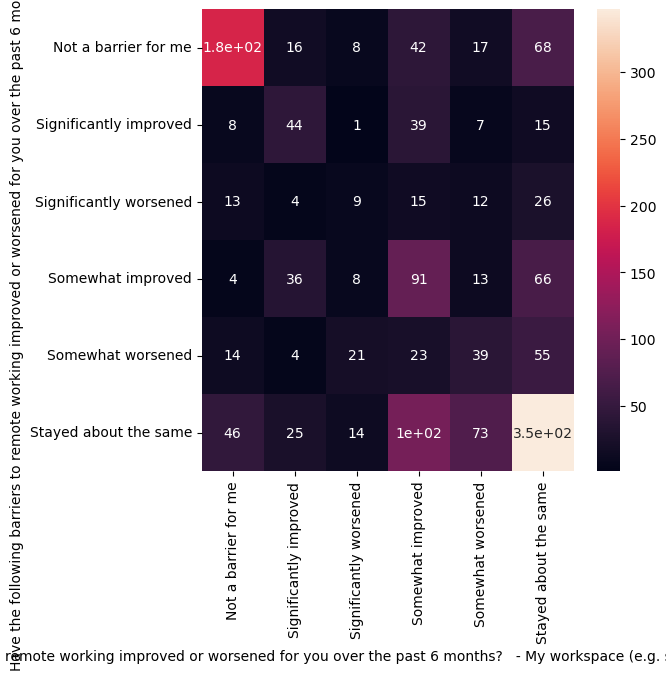

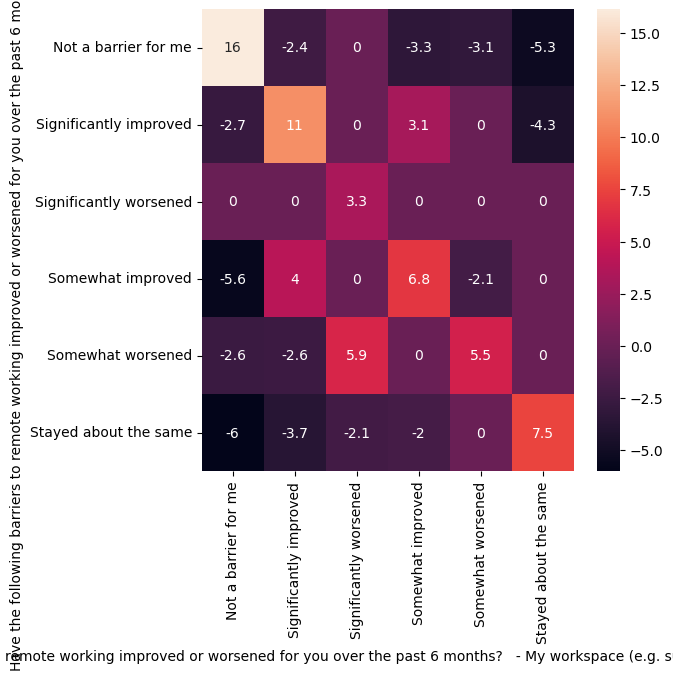

In [52]:
idx = 0
m.heatmap(idx,main_result,'count')
m.heatmap(idx,main_result,'chi2_residual')

In [45]:
# idx = 1
# m.heatmap(idx,main_result,'count')
# m.heatmap(idx,main_result,'chi2_residual')

In [ ]:
# idx = 2
# m.heatmap(idx,main_result,'count')
# m.heatmap(idx,main_result,'chi2_residual')

## relationship between TMS and WPF

There is no insightful discovery.

In [58]:
target_data_models = ['TMS','WPF']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .15)
main_result

The question numbers of TMS: [3, 7, 12, 13, 20, 21, 29, 30, 31, 32, 35, 48, 49, 53, 61]
The question numbers of WPF: [46, 56]
{'data model': ['PA', 'EF', 'TMS', 'OGP'], 'original IDs': [[4, 5], [4]], 'question': 'current occupation?', 'type': 'biology'}
{'data model': ['WPF'], 'original IDs': [[], [15]], 'question': 'How often do you work this way(worked part of your day remotely, and part of it at your employer’s workplace)?', 'type': 'experience'}
It can be correlated. p-value:0.008408118545754191
{'data model': ['PA', 'EF', 'TMS', 'OGP'], 'original IDs': [[4, 5], [4]], 'question': 'current occupation?', 'type': 'biology'}
{'data model': ['RWF', 'WPB', 'WPF', 'WTF', 'INF'], 'original IDs': [[], [64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91]], 'question': 'Think about when you worked at your employer’s workplace and some of your colleagues were working remotely. What were the biggest/smallest barriers of working this wa

,question1,question2,test_p-value,test_result,corr,corr_p-value,corr_test,is_q1,is_q2
12,How much of your work time does your employer’...,Think about when you worked at your employer’s...,0.000008,True,0.169410,NaN,Cramers V,TMS,WPF
3,How much of your work time does your employer’...,Think about when you worked at your employer’s...,0.000103,True,0.160472,NaN,Cramers V,TMS,WPF


In [60]:
# idx = 0
# m.heatmap(idx,main_result,'count')
# m.heatmap(idx,main_result,'chi2_residual')

## relationship between TMS and INF

We investigate the correlation between TMS and INF. The top 5 pairs of questions shows the correlation strength is over 0.4, which somewhat correlated. Technically speaking, it mainly describes how poor management improvement influences the infrastructure flexibility such as IT H/W and S/W equipment , cyber security. Looking into which levels contributes to the strength, you may realize the all the levels consistently explain the correlation. As you can see the second heatmap, it shows zeros for all the tabulated values. The value is the residual, that is the difference between the expectations and observations. If its absolute value is over 1.96, that indicates the occurrence of the difference is very unlikely. Otherwise, it shows zero. This graph shows all of values are zero. However, you can see the Spearman's correlation shows somewhat they are correlated. The integrated result lead us to conclude all the levels contributed to the difference. Other top 5 pairs also describes similar results. This is pretty convincing because Sheshadri(2022) also shows TMS commits to INF significantly.

![](img/sem_result.png)

In [61]:
target_data_models = ['TMS','INF']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)

The question numbers of TMS: [3, 7, 12, 13, 20, 21, 29, 30, 31, 32, 35, 48, 49, 53, 61]
The question numbers of INF: [16, 29, 30, 31, 32, 33, 34, 35, 56]
{'data model': ['PA', 'EF', 'TMS', 'OGP'], 'original IDs': [[4, 5], [4]], 'question': 'current occupation?', 'type': 'biology'}
{'data model': ['INF'], 'original IDs': [[16, 24], [28]], 'question': 'I could easily collaborate with colleagues when working remotely', 'type': 'team'}
It can be correlated. p-value:0.01403154711893534
Spearman"s correlation:-0.014 p-value:0.588
{'data model': ['PA', 'EF', 'TMS', 'OGP'], 'original IDs': [[4, 5], [4]], 'question': 'current occupation?', 'type': 'biology'}
{'data model': ['INF', 'EMS', 'TMS'], 'original IDs': [[40, 41], [49, 54, 52, 53, 51, 48]], 'question': 'the most/least significant barrier of WFH - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; IT equipment (computer, printer, etc.) ; Difficulty collaborating remotely ; Caring responsibilities', 

In [39]:
conceptual_model_questions = ym3.read_yaml()

In [62]:
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .4)
main_result

,question1,question2,test_p-value,test_result,corr,corr_p-value,corr_test,is_q1,is_q2
17,Have the following barriers to remote working ...,Have the following barriers to remote working ...,6.875012e-274,True,0.491595,8.221168e-93,Spearman,TMS,INF
9,Have the following barriers to remote working ...,Have the following barriers to remote working ...,2.522551e-228,True,0.432603,5.427882e-70,Spearman,TMS,INF
52,Have the following barriers to remote working ...,Have the following barriers to remote working ...,6.439671e-191,True,0.426586,6.600963e-68,Spearman,TMS,INF
13,Have the following barriers to remote working ...,Have the following barriers to remote working ...,8.826660e-213,True,0.419568,1.579002e-65,Spearman,TMS,INF
25,Have the following barriers to remote working ...,Have the following barriers to remote working ...,4.822314e-179,True,0.410035,2.190957e-62,Spearman,TMS,INF


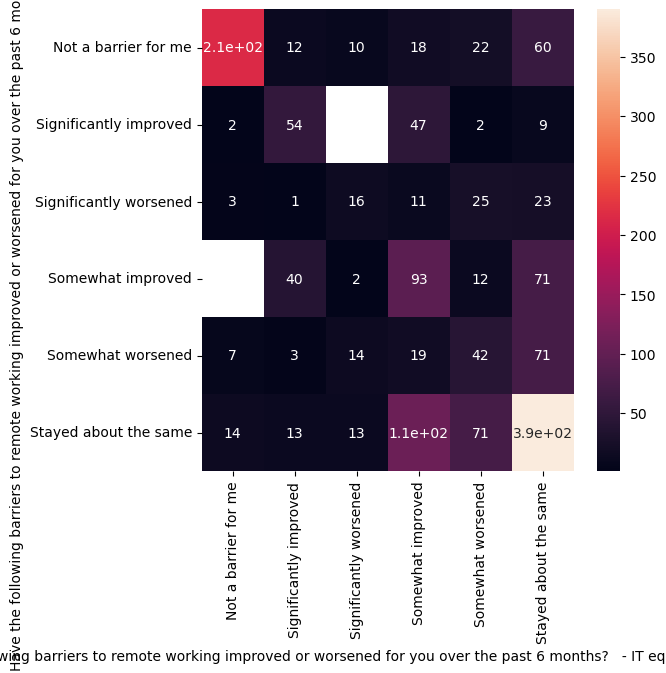

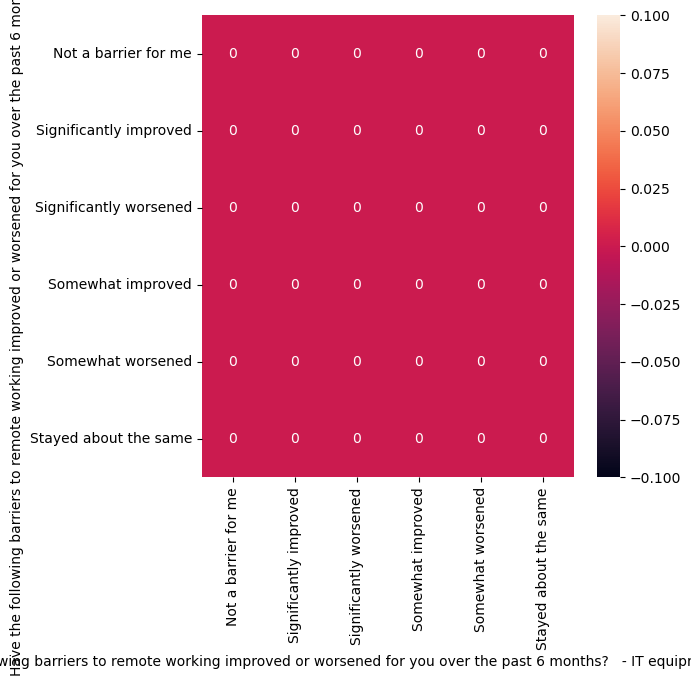

In [64]:
idx = 0
m.heatmap(idx,main_result,'count')
m.heatmap(idx,main_result,'chi2_residual')

In [69]:
# idx = 1
# m.heatmap(idx,main_result,'count')
# m.heatmap(idx,main_result,'chi2_residual')

In [70]:
# idx = 2
# m.heatmap(idx,main_result,'count')
# m.heatmap(idx,main_result,'chi2_residual')

In [71]:
# idx = 3
# m.heatmap(idx,main_result,'count')
# m.heatmap(idx,main_result,'chi2_residual')

In [72]:
# idx = 4
# m.heatmap(idx,main_result,'count')
# m.heatmap(idx,main_result,'chi2_residual')

## relationship between TMS and PRF

There is no insightful discovery.

In [24]:
target_data_models = ['TMS','PRF']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)

The question numbers of TMS: [3, 7, 12, 13, 20, 21, 29, 30, 31, 32, 35, 48, 49, 53, 61]
The question numbers of PRF: [68]
{'data model': ['PA', 'EF', 'TMS', 'OGP'], 'original IDs': [[4, 5], [4]], 'question': 'current occupation?', 'type': 'biology'}
{'data model': ['PRF'], 'original IDs': [[], [64, 65, 66, 67, 70, 71, 78, 79, 82, 83, 86, 87, 88, 89]], 'question': 'What were the biggest barriers of working this way? - Lack of privacy', 'type': 'effect'}
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis can

In [27]:
conceptual_model_questions = ym3.read_yaml()

In [30]:
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .15)
main_result

,question1,question2,test_p-value,test_result,corr,corr_p-value,corr_test,is_q1,is_q2
1,How much of your work time does your employer’...,Think about when you worked at your employer’s...,0.000008,True,0.169410,NaN,Cramers V,TMS,PRF
5,How much of your work time does your employer’...,Think about when you worked at your employer’s...,0.000054,True,0.164536,NaN,Cramers V,TMS,PRF
10,How much of your work time does your employer’...,Think about when you worked at your employer’s...,0.000124,True,0.161930,NaN,Cramers V,TMS,PRF
13,How much of your work time does your employer’...,Think about when you worked at your employer’s...,0.000595,True,0.157915,NaN,Cramers V,TMS,PRF
8,How much of your work time does your employer’...,Think about when you worked at your employer’s...,0.000314,True,0.153128,NaN,Cramers V,TMS,PRF


## relationship between EF and WPB

When it comes to external factors, the extra cost is the most significantly correlated to workspace, including suitable chairs, lighting, noise levels and facilities. All the levels contributes to the correlation power as the diagonal line in the graph shows the difference is unlikely happened. 

In [101]:
target_data_models = ['EF','WPB']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)

The question numbers of EF: [2, 3, 4, 8, 9, 36]
The question numbers of WPB: [31, 32, 34, 35, 56]


In [93]:
conceptual_model_questions = ym3.read_yaml()

In [102]:
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .3)
main_result

,question1,question2,test_p-value,test_result,corr,corr_p-value,corr_test,is_q1,is_q2
9,Have the following barriers to remote working ...,Have the following barriers to remote working ...,4.182449e-152,True,0.36725,1.741960e-49,Spearman,EF,WPB
3,Have the following barriers to remote working ...,Have the following barriers to remote working ...,9.648360e-145,True,0.32535,1.292678e-38,Spearman,EF,WPB


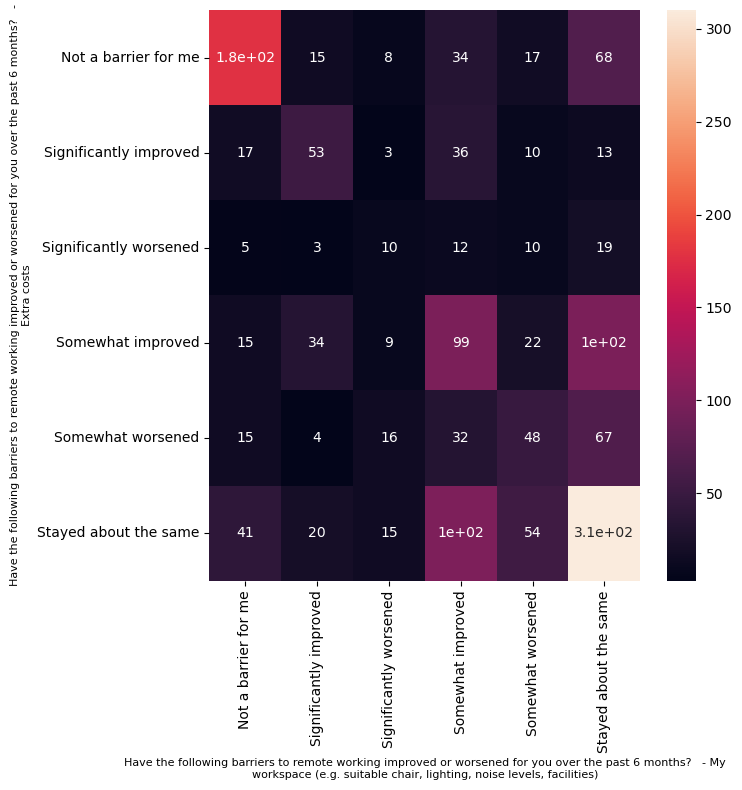

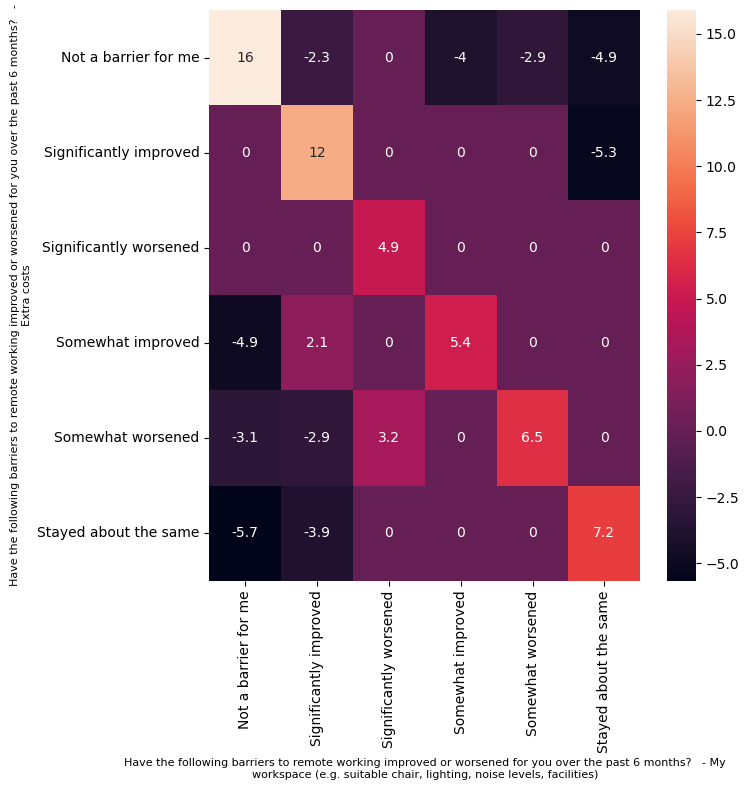

In [106]:
idx = 1
m.heatmap(idx,main_result,'count',size = (10,8))
m.heatmap(idx,main_result,'chi2_residual',size = (10,8))

## relationship between EF and WPF

There is no insightful discovery.

In [107]:
target_data_models = ['EF','WPF']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)

The question numbers of EF: [2, 3, 4, 8, 9, 36]
The question numbers of WPF: [46, 56]
{'data model': ['PA', 'EF'], 'original IDs': [[2, 3], [3]], 'question': 'industry', 'type': 'biology'}
{'data model': ['WPF'], 'original IDs': [[], [15]], 'question': 'How often do you work this way(worked part of your day remotely, and part of it at your employer’s workplace)?', 'type': 'experience'}
It can be correlated. p-value:0.00028156045972146243
{'data model': ['PA', 'EF'], 'original IDs': [[2, 3], [3]], 'question': 'industry', 'type': 'biology'}
{'data model': ['RWF', 'WPB', 'WPF', 'WTF', 'INF'], 'original IDs': [[], [64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91]], 'question': 'Think about when you worked at your employer’s workplace and some of your colleagues were working remotely. What were the biggest/smallest barriers of working this way?', 'type': 'flexibility'}
It can be correlated. p-value:0.0354055634753156
The null hy

In [108]:
conceptual_model_questions = ym3.read_yaml()

In [111]:
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .1)
main_result

,question1,question2,test_p-value,test_result,corr,corr_p-value,corr_test,is_q1,is_q2
8,Which of the following best describes your ind...,Think about when you worked at your employer’s...,0.003946,True,0.169276,NaN,Cramers V,EF,WPF
18,Which of the following best describes your ind...,Think about when you worked at your employer’s...,0.032174,True,0.151091,NaN,Cramers V,EF,WPF
8,Which of the following best describes your hou...,Think about when you worked at your employer’s...,0.010962,True,0.113870,NaN,Cramers V,EF,WPF
18,How long have you been in your current job? I...,Think about when you worked at your employer’s...,0.001147,True,0.110264,NaN,Cramers V,EF,WPF
1,Which of the following best describes your hou...,Think about when you worked at your employer’s...,0.015632,True,0.109917,NaN,Cramers V,EF,WPF
9,Which of the following best describes your hou...,Think about when you worked at your employer’s...,0.033332,True,0.106013,NaN,Cramers V,EF,WPF
20,Which of the following best describes your hou...,Think about when you worked at your employer’s...,0.047581,True,0.105743,NaN,Cramers V,EF,WPF
6,How many people are currently employed by your...,Think about when you worked at your employer’s...,0.000032,True,0.101861,NaN,Cramers V,EF,WPF


## relationship between EF and INF

There is no insightful discovery.

In [112]:
target_data_models = ['EF','INF']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)

The question numbers of EF: [2, 3, 4, 8, 9, 36]
The question numbers of INF: [16, 29, 30, 31, 32, 33, 34, 35, 56]
{'data model': ['PA', 'EF'], 'original IDs': [[2, 3], [3]], 'question': 'industry', 'type': 'biology'}
{'data model': ['INF'], 'original IDs': [[16, 24], [28]], 'question': 'I could easily collaborate with colleagues when working remotely', 'type': 'team'}
It can be correlated. p-value:0.022809209256936646
Spearman"s correlation:-0.011 p-value:0.66
{'data model': ['PA', 'EF'], 'original IDs': [[2, 3], [3]], 'question': 'industry', 'type': 'biology'}
{'data model': ['INF', 'EMS', 'TMS'], 'original IDs': [[40, 41], [49, 54, 52, 53, 51, 48]], 'question': 'the most/least significant barrier of WFH - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; IT equipment (computer, printer, etc.) ; Difficulty collaborating remotely ; Caring responsibilities', 'type': 'flexibility'}
It can be correlated. p-value:0.0008831694751695418
Spearman"s corr

In [113]:
conceptual_model_questions = ym3.read_yaml()

In [115]:
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .3)
main_result

,question1,question2,test_p-value,test_result,corr,corr_p-value,corr_test,is_q1,is_q2
7,Have the following barriers to remote working ...,Have the following barriers to remote working ...,1.070569e-144,True,0.363460,1.965711e-48,Spearman,EF,INF
3,Have the following barriers to remote working ...,Have the following barriers to remote working ...,1.193740e-150,True,0.340496,2.358931e-42,Spearman,EF,INF
5,Have the following barriers to remote working ...,Have the following barriers to remote working ...,1.751033e-177,True,0.316470,1.609845e-36,Spearman,EF,INF


In [119]:
# idx = 0
# m.heatmap(idx,main_result,'count',size = (10,8))
# m.heatmap(idx,main_result,'chi2_residual',size = (10,8))

## relationship between EF and PRF

There is no insightful discovery.

In [31]:
target_data_models = ['EF','PRF']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)

The question numbers of EF: [2, 3, 4, 8, 9, 36]
The question numbers of PRF: [68]
{'data model': ['PA', 'EF'], 'original IDs': [[2, 3], [3]], 'question': 'industry', 'type': 'biology'}
{'data model': ['PRF'], 'original IDs': [[], [64, 65, 66, 67, 70, 71, 78, 79, 82, 83, 86, 87, 88, 89]], 'question': 'What were the biggest barriers of working this way? - Lack of privacy', 'type': 'effect'}
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
It can be correlated. p-value:0.0011357525479067049
The null hypothesis cannot be rejected.
It can be correlated. p-value:0.00792841857394346
It can be correlated. p-value:0.029139100634716225
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
{'data model': 

In [32]:
conceptual_model_questions = ym3.read_yaml()

In [33]:
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .15)
main_result

,question1,question2,test_p-value,test_result,corr,corr_p-value,corr_test,is_q1,is_q2
4,Which of the following best describes your ind...,Think about when you worked at your employer’s...,0.001136,True,0.173141,NaN,Cramers V,EF,PRF
6,Which of the following best describes your ind...,Think about when you worked at your employer’s...,0.007928,True,0.162987,NaN,Cramers V,EF,PRF
7,Which of the following best describes your ind...,Think about when you worked at your employer’s...,0.029139,True,0.154116,NaN,Cramers V,EF,PRF


## relationship between OGP and WPB

There is no insightful discovery.

In [120]:
target_data_models = ['OGP','WPB']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)

The question numbers of OGP: [3, 7, 12, 13, 44, 48, 49, 50]
The question numbers of WPB: [31, 32, 34, 35, 56]
{'data model': ['PA', 'EF', 'TMS', 'OGP'], 'original IDs': [[4, 5], [4]], 'question': 'current occupation?', 'type': 'biology'}
{'data model': ['INF', 'EMS', 'TMS', 'WPB'], 'original IDs': [[44, 45], [49, 50, 54, 58]], 'question': "the most/least significant barrier of WFH - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; My organisation's software and systems ; My workspace (e.g. suitable chair, lighting, noise levels, facilities) ; I have tasks that can't be done remotely", 'type': 'flexibility'}
It can be correlated. p-value:7.032627325780732e-05
Spearman"s correlation:-0.018 p-value:0.479
It can be correlated. p-value:0.0004583660584845063
Spearman"s correlation:-0.021 p-value:0.419
It can be correlated. p-value:0.00011958676039609954
Spearman"s correlation:-0.017 p-value:0.521
The null hypothesis cannot be rejected.
Spearman"s corr

In [123]:
conceptual_model_questions = ym3.read_yaml()

In [127]:
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .15)
main_result

,question1,question2,test_p-value,test_result,corr,corr_p-value,corr_test,is_q1,is_q2
3,Thinking about remote working in the last 6 mo...,Have the following barriers to remote working ...,6.820568e-20,True,0.184802,4.407100e-13,Spearman,OGP,WPB
2,How much of your work time does your employer’...,Think about when you worked at your employer’s...,7.324452e-06,True,0.178759,NaN,Cramers V,OGP,WPB
12,How much of your work time does your employer’...,Think about when you worked at your employer’s...,8.116002e-06,True,0.169410,NaN,Cramers V,OGP,WPB
11,Thinking about your employer’s policy on remot...,Have the following barriers to remote working ...,4.398018e-16,True,0.167737,5.255805e-11,Spearman,OGP,WPB
29,Thinking about your employer’s policy on remot...,Have the following barriers to remote working ...,6.206774e-14,True,0.162399,2.128433e-10,Spearman,OGP,WPB
26,How much of your work time does your employer’...,Think about when you worked at your employer’s...,1.243025e-04,True,0.161930,NaN,Cramers V,OGP,WPB
3,How much of your work time does your employer’...,Think about when you worked at your employer’s...,1.025791e-04,True,0.160472,NaN,Cramers V,OGP,WPB
27,How much of your work time does your employer’...,Think about when you worked at your employer’s...,5.951712e-04,True,0.157915,NaN,Cramers V,OGP,WPB
22,How much of your work time does your employer’...,Think about when you worked at your employer’s...,3.140556e-04,True,0.153128,NaN,Cramers V,OGP,WPB


## relationship between OGP and WPF

There is no insightful discovery.

In [128]:
target_data_models = ['OGP','WPF']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)

The question numbers of OGP: [3, 7, 12, 13, 44, 48, 49, 50]
The question numbers of WPF: [46, 56]
{'data model': ['PA', 'EF', 'TMS', 'OGP'], 'original IDs': [[4, 5], [4]], 'question': 'current occupation?', 'type': 'biology'}
{'data model': ['WPF'], 'original IDs': [[], [15]], 'question': 'How often do you work this way(worked part of your day remotely, and part of it at your employer’s workplace)?', 'type': 'experience'}
It can be correlated. p-value:0.008408118545754191
{'data model': ['PA', 'EF', 'TMS', 'OGP'], 'original IDs': [[4, 5], [4]], 'question': 'current occupation?', 'type': 'biology'}
{'data model': ['RWF', 'WPB', 'WPF', 'WTF', 'INF'], 'original IDs': [[], [64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91]], 'question': 'Think about when you worked at your employer’s workplace and some of your colleagues were working remotely. What were the biggest/smallest barriers of working this way?', 'type': 'flexibility'}


In [129]:
conceptual_model_questions = ym3.read_yaml()

In [130]:
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .15)
main_result

,question1,question2,test_p-value,test_result,corr,corr_p-value,corr_test,is_q1,is_q2
12,How much of your work time does your employer’...,Think about when you worked at your employer’s...,0.000008,True,0.169410,NaN,Cramers V,OGP,WPF
3,How much of your work time does your employer’...,Think about when you worked at your employer’s...,0.000103,True,0.160472,NaN,Cramers V,OGP,WPF


## relationship between OGP and INF

There is no insightful discovery.

In [131]:
target_data_models = ['OGP','INF']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)

The question numbers of OGP: [3, 7, 12, 13, 44, 48, 49, 50]
The question numbers of INF: [16, 29, 30, 31, 32, 33, 34, 35, 56]
{'data model': ['PA', 'EF', 'TMS', 'OGP'], 'original IDs': [[4, 5], [4]], 'question': 'current occupation?', 'type': 'biology'}
{'data model': ['INF'], 'original IDs': [[16, 24], [28]], 'question': 'I could easily collaborate with colleagues when working remotely', 'type': 'team'}
It can be correlated. p-value:0.01403154711893534
Spearman"s correlation:-0.014 p-value:0.588
{'data model': ['PA', 'EF', 'TMS', 'OGP'], 'original IDs': [[4, 5], [4]], 'question': 'current occupation?', 'type': 'biology'}
{'data model': ['INF', 'EMS', 'TMS'], 'original IDs': [[40, 41], [49, 54, 52, 53, 51, 48]], 'question': 'the most/least significant barrier of WFH - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; IT equipment (computer, printer, etc.) ; Difficulty collaborating remotely ; Caring responsibilities', 'type': 'flexibility'}
It ca

In [132]:
conceptual_model_questions = ym3.read_yaml()

In [134]:
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .2)
main_result

,question1,question2,test_p-value,test_result,corr,corr_p-value,corr_test,is_q1,is_q2
25,Thinking about your employer’s policy on remot...,Have the following barriers to remote working ...,4.544138e-36,True,0.215686,2.254259e-17,Spearman,OGP,INF
16,Thinking about your employer’s policy on remot...,Have the following barriers to remote working ...,3.083824e-36,True,0.200647,3.385302e-15,Spearman,OGP,INF


In [139]:
# idx = 0
# m.heatmap(idx,main_result,'count',size = (8,10))
# m.heatmap(idx,main_result,'chi2_residual',size = (8,10))

## relationship between OGP and PRF

There is no insightful discovery.

In [34]:
target_data_models = ['OGP','PRF']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)

The question numbers of OGP: [3, 7, 12, 13, 44, 48, 49, 50]
The question numbers of PRF: [68]
{'data model': ['PA', 'EF', 'TMS', 'OGP'], 'original IDs': [[4, 5], [4]], 'question': 'current occupation?', 'type': 'biology'}
{'data model': ['PRF'], 'original IDs': [[], [64, 65, 66, 67, 70, 71, 78, 79, 82, 83, 86, 87, 88, 89]], 'question': 'What were the biggest barriers of working this way? - Lack of privacy', 'type': 'effect'}
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
{'data mode

In [35]:
conceptual_model_questions = ym3.read_yaml()

In [37]:
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .15)
main_result

,question1,question2,test_p-value,test_result,corr,corr_p-value,corr_test,is_q1,is_q2
1,How much of your work time does your employer’...,Think about when you worked at your employer’s...,0.000008,True,0.169410,NaN,Cramers V,OGP,PRF
5,How much of your work time does your employer’...,Think about when you worked at your employer’s...,0.000054,True,0.164536,NaN,Cramers V,OGP,PRF
10,How much of your work time does your employer’...,Think about when you worked at your employer’s...,0.000124,True,0.161930,NaN,Cramers V,OGP,PRF
13,How much of your work time does your employer’...,Think about when you worked at your employer’s...,0.000595,True,0.157915,NaN,Cramers V,OGP,PRF
8,How much of your work time does your employer’...,Think about when you worked at your employer’s...,0.000314,True,0.153128,NaN,Cramers V,OGP,PRF


## relationship between WPB and RWF

Although it is strong correlation, workspace improvement and taking longer break is correlated. According to the Chi-Square residual test, you can see when workspace is significantly improved, there is a trend that respondents agree to have longer break. That would be assumed because cozy home environment make employees more relaxed, which triggers them to take a break many times. 

In [140]:
target_data_models = ['WPB','RWF']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)

The question numbers of WPB: [31, 32, 34, 35, 56]
The question numbers of RWF: [11, 14, 15, 22, 45, 51, 56, 60]
{'data model': ['INF', 'EMS', 'TMS', 'WPB'], 'original IDs': [[44, 45], [49, 50, 54, 58]], 'question': "the most/least significant barrier of WFH - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; My organisation's software and systems ; My workspace (e.g. suitable chair, lighting, noise levels, facilities) ; I have tasks that can't be done remotely", 'type': 'flexibility'}
{'data model': ['RWF'], 'original IDs': [[11, 19], [10, 8]], 'question': 'how much of your time did you spend remote working?', 'type': 'experience'}
It can be correlated. p-value:1.5244898439993842e-10
Spearman"s correlation:-0.046 p-value:0.077
It can be correlated. p-value:1.8111095048100427e-06
Spearman"s correlation:-0.039 p-value:0.126
It can be correlated. p-value:3.0669953208871914e-07
Spearman"s correlation:-0.041 p-value:0.112
It can be correlated. p-value

In [143]:
conceptual_model_questions = ym3.read_yaml()

In [146]:
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .2)
main_result

,question1,question2,test_p-value,test_result,corr,corr_p-value,corr_test,is_q1,is_q2
19,Have the following barriers to remote working ...,Thinking about remote working in the last 6 mo...,3.578844e-12,True,0.219070,6.918476e-18,Spearman,WPB,RWF
7,Have the following barriers to remote working ...,Thinking about remote working in the last 6 mo...,3.314431e-15,True,0.204345,1.022775e-15,Spearman,WPB,RWF


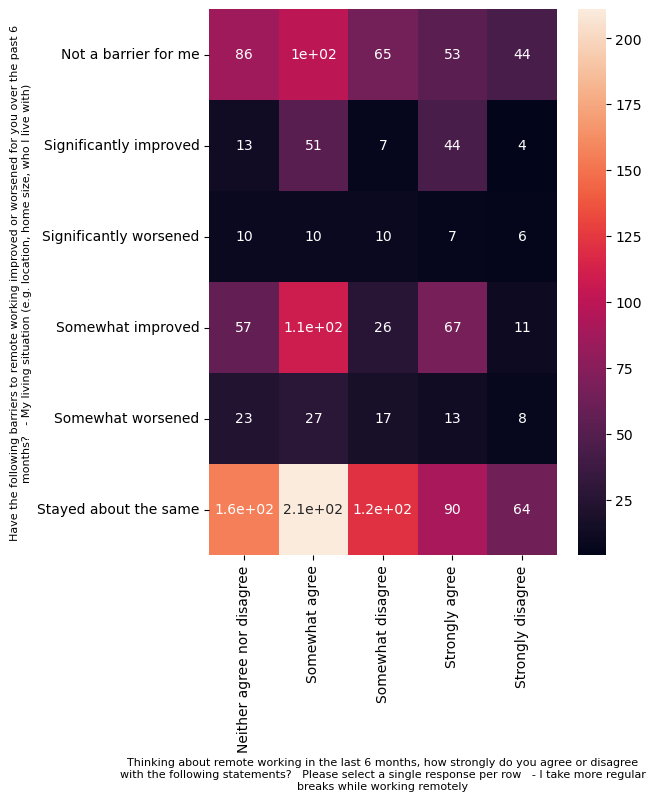

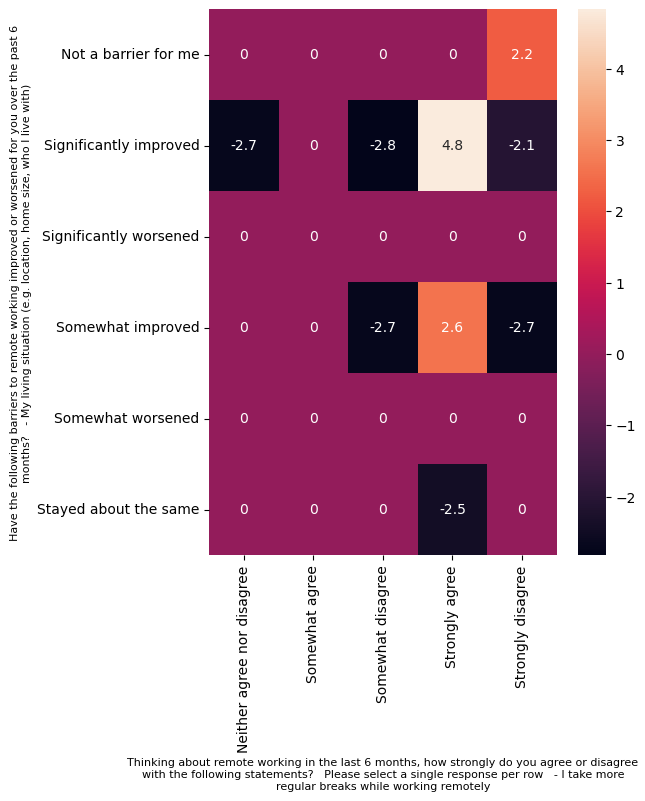

In [150]:
idx = 0
m.heatmap(idx,main_result,'count',size = (10,8))
m.heatmap(idx,main_result,'chi2_residual',size = (10,8))

## relationship between WPF and RWF

There is no insightful discovery.

In [151]:
target_data_models = ['WPF','RWF']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)

The question numbers of WPF: [46, 56]
The question numbers of RWF: [11, 14, 15, 22, 45, 51, 56, 60]
{'data model': ['WPF'], 'original IDs': [[], [15]], 'question': 'How often do you work this way(worked part of your day remotely, and part of it at your employer’s workplace)?', 'type': 'experience'}
{'data model': ['RWF'], 'original IDs': [[11, 19], [10, 8]], 'question': 'how much of your time did you spend remote working?', 'type': 'experience'}
It can be correlated. p-value:8.942218133320793e-139
It can be correlated. p-value:1.7413693741172606e-205
{'data model': ['WPF'], 'original IDs': [[], [15]], 'question': 'How often do you work this way(worked part of your day remotely, and part of it at your employer’s workplace)?', 'type': 'experience'}
{'data model': ['RWF'], 'original IDs': [[14, 22], [26]], 'question': 'It was common for people in my organisation to work remotely', 'type': 'acceptance'}
It can be correlated. p-value:0.0006550811128123087
Spearman"s correlation:-0.038 p-val

g:\マイドライブ\Colab Notebooks\MSDS\DSC 672 DATA SCIENCE CAPSTONE\Project\conseptual_model\correlation_stats_methods.py:86: RuntimeWarning: invalid value encountered in scalar divide
  corr = np.sqrt(chisq / (n * (min(table.shape) -1)))


It can be correlated. p-value:1.2291958517419906e-09
It can be correlated. p-value:6.911653174020955e-10
It can be correlated. p-value:1.074487266386789e-09
It can be correlated. p-value:1.8564182385496314e-07
It can be correlated. p-value:2.7735577645024254e-12
It can be correlated. p-value:3.4015289537314424e-08
It can be correlated. p-value:9.527512322747135e-10
It can be correlated. p-value:1.091666614934365e-08
It can be correlated. p-value:7.898317947061742e-11
It can be correlated. p-value:2.9429453335112744e-08
It can be correlated. p-value:4.9606115429844564e-11
It can be correlated. p-value:1.6268428409936094e-07
It can be correlated. p-value:2.8491093417956242e-08
It can be correlated. p-value:1.9698200420766088e-08
It can be correlated. p-value:2.0191307450129346e-08
It can be correlated. p-value:5.565921278206969e-09
It can be correlated. p-value:5.406632965399275e-09
It can be correlated. p-value:6.17887205186162e-10
It can be correlated. p-value:9.508925704716847e-10
It 

In [152]:
conceptual_model_questions = ym3.read_yaml()

In [154]:
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .15)
main_result

,question1,question2,test_p-value,test_result,corr,corr_p-value,corr_test,is_q1,is_q2
20,Think about when you worked at your employer’s...,"Thinking about your current job, how much of y...",2.045390e-30,True,0.172433,NaN,Cramers V,WPF,RWF
34,Think about when you worked at your employer’s...,"Thinking about your current job, how much of y...",1.225239e-27,True,0.162759,NaN,Cramers V,WPF,RWF
40,Think about when you worked at your employer’s...,"Thinking about your current job, how much of y...",1.304808e-27,True,0.161036,NaN,Cramers V,WPF,RWF
51,Think about when you worked at your employer’s...,"Thinking about your current job, how much of y...",9.585364e-33,True,0.155793,NaN,Cramers V,WPF,RWF


## relationship between INF and RWF * something wrong

There is no insightful discovery.

In [155]:
target_data_models = ['INF','RWF']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)

The question numbers of INF: [16, 29, 30, 31, 32, 33, 34, 35, 56]
The question numbers of RWF: [11, 14, 15, 22, 45, 51, 56, 60]
{'data model': ['INF'], 'original IDs': [[16, 24], [28]], 'question': 'I could easily collaborate with colleagues when working remotely', 'type': 'team'}
{'data model': ['RWF'], 'original IDs': [[11, 19], [10, 8]], 'question': 'how much of your time did you spend remote working?', 'type': 'experience'}
It can be correlated. p-value:8.514578333211748e-27
Spearman"s correlation:-0.134 p-value:0.0
It can be correlated. p-value:9.173599000260705e-24
Spearman"s correlation:-0.085 p-value:0.001
{'data model': ['INF'], 'original IDs': [[16, 24], [28]], 'question': 'I could easily collaborate with colleagues when working remotely', 'type': 'team'}
{'data model': ['RWF'], 'original IDs': [[14, 22], [26]], 'question': 'It was common for people in my organisation to work remotely', 'type': 'acceptance'}
It can be correlated. p-value:3.147649830047959e-66
Spearman"s corre

In [156]:
conceptual_model_questions = ym3.read_yaml()

In [172]:
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .20)
main_result

,question1,question2,test_p-value,test_result,corr,corr_p-value,corr_test,is_q1,is_q2
10,Have the following barriers to remote working ...,"Thinking about your current job, how much of y...",0.0,True,1.0,0.0,Spearman,INF,RWF
11,Have the following barriers to remote working ...,"Thinking about your current job, how much of y...",0.0,True,1.0,0.0,Spearman,INF,RWF
3,Have the following barriers to remote working ...,Thinking about remote working in the last 6 mo...,0.0,True,1.0,0.0,Spearman,INF,RWF
2,Have the following barriers to remote working ...,Thinking about remote working in the last 6 mo...,0.0,True,1.0,0.0,Spearman,INF,RWF
1,Have the following barriers to remote working ...,"In the past 6 months, have you ever worked par...",0.0,True,1.0,0.0,Spearman,INF,RWF
1,Have the following barriers to remote working ...,Imagine that COVID-19 is cured or eradicated. ...,0.0,True,1.0,0.0,Spearman,INF,RWF
1,Have the following barriers to remote working ...,Thinking about remote working in the last 6 mo...,0.0,True,1.0,0.0,Spearman,INF,RWF
1,Have the following barriers to remote working ...,Thinking about remote working in the last 6 mo...,0.0,True,1.0,0.0,Spearman,INF,RWF
3,Have the following barriers to remote working ...,"Thinking about your current job, how much of y...",0.0,True,1.0,0.0,Spearman,INF,RWF
2,Have the following barriers to remote working ...,"Thinking about your current job, how much of y...",0.0,True,1.0,0.0,Spearman,INF,RWF


## relationship between PRF and RWF

There is no insightful discovery.

In [38]:
target_data_models = ['PRF','RWF']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)

The question numbers of PRF: [68]
The question numbers of RWF: [11, 14, 15, 22, 45, 51, 56, 60]
{'data model': ['PRF'], 'original IDs': [[], [64, 65, 66, 67, 70, 71, 78, 79, 82, 83, 86, 87, 88, 89]], 'question': 'What were the biggest barriers of working this way? - Lack of privacy', 'type': 'effect'}
{'data model': ['RWF'], 'original IDs': [[11, 19], [10, 8]], 'question': 'how much of your time did you spend remote working?', 'type': 'experience'}
It can be correlated. p-value:5.1505157657152514e-24
It can be correlated. p-value:2.676983825248308e-27
It can be correlated. p-value:1.390053804419269e-23
It can be correlated. p-value:2.6472477010126165e-29
It can be correlated. p-value:3.7378517391241384e-26
It can be correlated. p-value:1.3622873648232468e-29
It can be correlated. p-value:3.301585983994623e-27
It can be correlated. p-value:5.762893570217202e-29
It can be correlated. p-value:1.3877543970364801e-24
It can be correlated. p-value:2.0028579292158557e-27
It can be correlated.

In [39]:
conceptual_model_questions = ym3.read_yaml()

In [41]:
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .15)
main_result

,question1,question2,test_p-value,test_result,corr,corr_p-value,corr_test,is_q1,is_q2
22,Think about when you worked at your employer’s...,"Thinking about your current job, how much of y...",2.045390e-30,True,0.172433,NaN,Cramers V,PRF,RWF
12,Think about when you worked at your employer’s...,"Thinking about your current job, how much of y...",3.221999e-28,True,0.164210,NaN,Cramers V,PRF,RWF
24,Think about when you worked at your employer’s...,"Thinking about your current job, how much of y...",1.225239e-27,True,0.162759,NaN,Cramers V,PRF,RWF
18,Think about when you worked at your employer’s...,"Thinking about your current job, how much of y...",1.304808e-27,True,0.161036,NaN,Cramers V,PRF,RWF
14,Think about when you worked at your employer’s...,"Thinking about your current job, how much of y...",2.999001e-27,True,0.160210,NaN,Cramers V,PRF,RWF
13,Think about when you worked at your employer’s...,"Thinking about your current job, how much of y...",1.135727e-33,True,0.159052,NaN,Cramers V,PRF,RWF
16,Think about when you worked at your employer’s...,"Thinking about your current job, how much of y...",4.492039e-27,True,0.156115,NaN,Cramers V,PRF,RWF
15,Think about when you worked at your employer’s...,"Thinking about your current job, how much of y...",5.664877e-32,True,0.154020,NaN,Cramers V,PRF,RWF
20,Think about when you worked at your employer’s...,"Thinking about your current job, how much of y...",4.655398e-26,True,0.150028,NaN,Cramers V,PRF,RWF


## relationship between RWF and EMS

There is no insightful discovery.

In [43]:
target_data_models = ['RWF','EMS']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
# collection_df = m.execute(common_q_comb)

The question numbers of RWF: [11, 14, 15, 22, 45, 51, 56, 60]
The question numbers of EMS: [26, 27, 29, 30, 31, 32, 33, 34, 35, 38, 39, 40, 41, 42, 43, 52, 57, 58, 59, 62]


In [48]:
collection = []

for cqm in common_q_comb:
    target_qids_dfs = q.two_qids_dfs(cqm[0],cqm[1])
    q_comb = q.question_combination('2021',target_qids_dfs,suffix = '_duplicated')
    print('Q COMBINATION:{}'.format(q_comb))
    result_list = sm.main(q_comb,target_qids_dfs,'2021',.05,likert_scale,qualified_fill_type = 'empty',quantified_fill_type = 'mean')
    result_df = pd.DataFrame(result_list,columns = ['question1','question2','test_p-value','test_result','corr','corr_p-value','corr_test'])
    collection.append(result_df)

collection_df = pd.concat(collection)
collection_df = collection_df.drop_duplicates()

{'data model': ['RWF'], 'original IDs': [[11, 19], [10, 8]], 'question': 'how much of your time did you spend remote working?', 'type': 'experience'}
{'data model': ['EMS'], 'original IDs': [[34, 38], [39, 44]], 'question': 'how many hours would you spend doing personal and family time?', 'type': 'experience'}
Q COMBINATION:[('Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time.', "Think about your experience this year. On a day when you attend your employer's workplace, how many hours would you spend doing the following activities?   For example, a response of ‘1’ means 1 hour.  A response of ‘0.5’ means half an hour.   Your responses should add to 24 hours.   - Personal and family time"), ('Thinking about your current job, how much of your work time did you spend working remotely in the last quarter o

ValueError: Data must be at least length 3.

In [12]:
conceptual_model_questions = ym3.read_yaml()

In [ ]:
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .20)
main_result

## relationship between RWF and EMP

There is no insightful discovery.

In [11]:
target_data_models = ['RWF','EMP']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)

The question numbers of RWF: [11, 14, 15, 22, 45, 51, 56, 60]
The question numbers of EMP: [5, 6, 19, 23, 25, 38, 39, 40, 41, 42, 43, 52, 64, 65, 66, 67]
{'data model': ['RWF'], 'original IDs': [[11, 19], [10, 8]], 'question': 'how much of your time did you spend remote working?', 'type': 'experience'}
{'data model': ['EMP'], 'original IDs': [[], [107]], 'question': 'Roughly how productive are the employees you manage, each hour, when they work remotely?', 'type': 'productivity'}
It can be correlated. p-value:7.505357093727013e-11
It can be correlated. p-value:6.317573663426414e-14
{'data model': ['RWF'], 'original IDs': [[11, 19], [10, 8]], 'question': 'how much of your time did you spend remote working?', 'type': 'experience'}
{'data model': ['EMP'], 'original IDs': [[], [105]], 'question': 'I find it easy to contact my employees when they work remotely', 'type': 'effect'}
It can be correlated. p-value:3.0219957297889515e-12
It can be correlated. p-value:2.7764272518560512e-11
{'data

ValueError: Data must be at least length 3.

In [ ]:
conceptual_model_questions = ym3.read_yaml()

In [ ]:
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .20)
main_result

## relationship between PA and WP

There is no insightful discovery.

In [14]:
target_data_models = ['PA','WP']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)

The question numbers of PA: [0, 1, 2, 3, 8, 9, 10]
The question numbers of WP: [17, 18, 47, 54, 55]
{'data model': ['PA'], 'original IDs': [[0], [0]], 'question': 'What year were you born?', 'type': 'biology'}
{'data model': ['WP'], 'original IDs': [[17, 25], []], 'question': 'I would recommend remote working to others', 'type': 'preference'}
{'data model': ['PA'], 'original IDs': [[0], [0]], 'question': 'What year were you born?', 'type': 'biology'}
{'data model': ['WP'], 'original IDs': [[18, 26, 27], [9, 11, 12]], 'question': 'How much of your time would you have preferred to work remotely?', 'type': 'preference'}
The data can be said to normally distributed. p-value:0.0004145113634876907
The data can be said to normally distributed. p-value:4.051328232890228e-06
The null hypothesis cannot be rejected.
The data can be said to normally distributed. p-value:0.00028143409872427583
The data can be said to normally distributed. p-value:4.404640549182659e-06
The null hypothesis cannot be 

ValueError: Data must be at least length 3.

## relationship between EMS and ORP

There is no insightful discovery.

In [13]:
target_data_models = ['EMS','ORP']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)

The question numbers of EMS: [26, 27, 29, 30, 31, 32, 33, 34, 35, 38, 39, 40, 41, 42, 43, 52, 57, 58, 59, 62]
The question numbers of ORP: [52, 63]
{'data model': ['EMS'], 'original IDs': [[34, 38], [39, 44]], 'question': 'how many hours would you spend doing personal and family time?', 'type': 'experience'}
{'data model': ['EMS', 'EMP', 'ORP'], 'original IDs': [[], [31]], 'question': 'Do you think remote working is a positive or a negative for your employer?', 'type': 'acceptance'}
The data can be said to normally distributed. p-value:1.3124812787155063e-14
The data can be said to normally distributed. p-value:1.420368107574177e-07
The data can be said to normally distributed. p-value:2.237709110110948e-16
The data can be said to normally distributed. p-value:2.21767186303623e-06
The null hypothesis cannot be rejected.
The null hypothesis cannot be rejected.
The variables would not be correlated
Spearman"s correlation:-0.016 p-value:0.539
The data can be said to normally distributed. 

ValueError: Data must be at least length 3.

In [ ]:
conceptual_model_questions = ym3.read_yaml()

In [ ]:
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .20)
main_result

## relationship between EMP and ORP

There is no insightful discovery.

In [ ]:
target_data_models = ['EMP','ORP']
m = main(target_data_models,questions,questions_2020,questions_2021,rws_2020,rws_2021)
common_q_comb = m.get_common_qs()
collection_df = m.execute(common_q_comb)

In [ ]:
conceptual_model_questions = ym3.read_yaml()

In [ ]:
collection_df_copy = m.add_info(collection_df,conceptual_model_questions)
main_result = m.get_top_corr(collection_df_copy,corr_strength = .20)
main_result